# 시나리오
- 사과, 파인애플, 바나나에 있는 각 픽셀의 평균을 구해서 가장 가까운 사진을 고를 수 있음
- 실제 비지도 학습에서는 사진에 어떤 과일이 들어있는지 알 수 없음
- 사진에 어떤 과일이 없는 상황에서 비슷한 과일을 구분하여 평균값을 구하려면?
- K-means 군집 알고리즘을 사용

## K-means
- 각 클러스터의 평균을 이용하여 군집을 형성
- 클러스터 중심(cluster center) 또는 센트로이드(centroid)라고 칭하기도 함

### 동작 방식
    1) 무작위로 k개의 클러스터 중심을 정한다.(k는 n_clusters=파라미터로 지정)  
    2) 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정  
    3) 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경  
    4) 클러스터 중심에 변화가 없을 때까지 2)번으로 돌아가서 반복 수행  

### 데이터 준비

In [1]:
import numpy as np

# 과일 사진 데이터 불러오기
fruits = np.load('fruits_300.npy')

# (샘플개수, 너비, 높이)인 3차원 배열을 (샘플개수 너비x높이)크기로 변환
fruits_2d = fruits.reshape(-1, 100*100)

### KMeans 모델 사용
- 비지도 학습이므로 fit()메서드에 정답 데이터를 사용하지 않음
- 군집 결과는 labels_ 속성에 저장됨
- labels_ 의 길이는 샘플 개수와 같으며 각 샘플이 어떤 레이블에 해당되는지 나타냄
- n_clusters=3으로 지정했으므로 클래스는 0, 1, 2 중 하나의 값으로 만들어짐

In [2]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=3, random_state=42)

# 학습하기
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [3]:
# 레이블 확인
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##### 해석
- 레이블의 0, 1, 2는 아무 순서도 없음. 단순 분류된 클래스를 구분하는 용도
- 0, 1, 2에 해당되는 과일이 어떤 과일인지 확인을 위해 이미지를 출력해보아야 함

In [4]:
# 0, 1, 2에 해당되는 샘플의 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))

In [5]:
# 이미지 출력을 위한 함수 정의
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

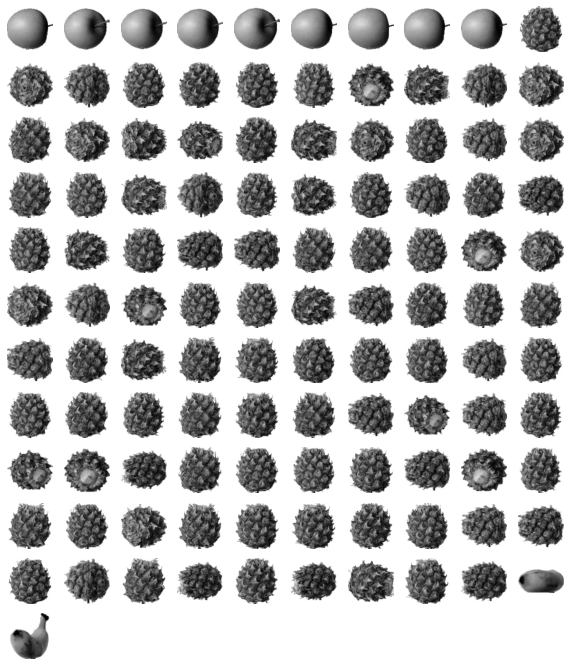

In [6]:
draw_fruits(fruits[km.labels_ == 0])

##### 해석
- 레이블 0으로 클러스터링 된 111개의 이미지를 모두 출력
- 파인애플이 군집으로 만들어진 것으로 보임

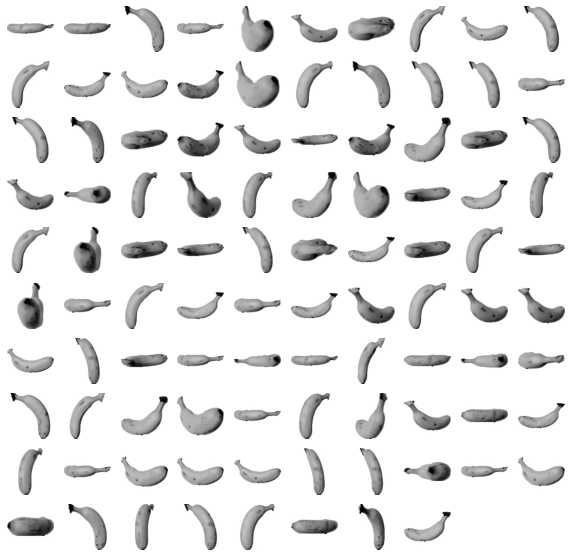

In [7]:
draw_fruits(fruits[km.labels_ == 1])

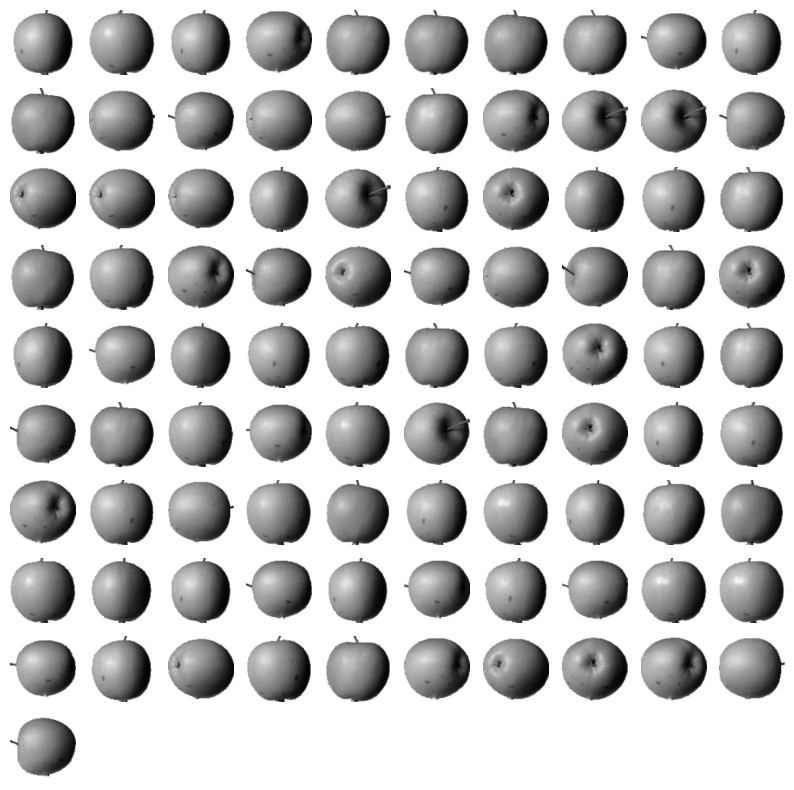

In [8]:
draw_fruits(fruits[km.labels_ == 2])

##### 결과
- 완벽하게 구별하지는 못했으나 k-means알고리즘이 스스로 비슷한 샘플을 잘 구분지어 모은 것을 알 수 있다.

### 클러스터의 중심
- KMeans 클래스가 최종적으로 찾은 클러스터의 중심은 cluster_centers_ 속성에 저장되어 있음
- 이 배열은 friuts_2d 샘플의 클러스터 중심이므로 이미지로 출력하기 위해 100x100크기의 2차원 배열로 변환이 필요

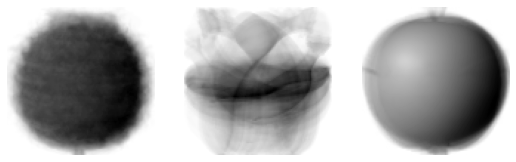

In [12]:
# 2차원 배열로 변환하여 이미지 중심을 출력
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

##### 해석
- 이전에 직접 평균을 이용해서 그렸던 중심과 비슷한 모양의 결과를 보임

In [8]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform() 사용
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [9]:
# 예측하기
km.predict(fruits_2d[100:101])

array([0])

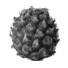

In [10]:
# 예측한 샘플이 맞는지 이미지로 출력하여 확인
draw_fruits(fruits[100:101])

In [11]:
# 중심을 찾기위해 반복 수행한 횟수는 확인
km.n_iter_

4

### 최적의 k 값 찾는 방법
- k-means는 클러스터 개수를 미리 지정해야 함
- 실제 데이터는 몇 개의 클러스터가 만들어질지 예상할 수 없음
- 최적의 k를 찾는 완벽한 방법은 없음
#### 엘보우(elbow) 방법
- k-maens는 클러스터 중심과 클러스터에 속한 샘플 사이의 거래를 잴 수 있음
- 이 거리의 제곱 합을 이너셔(inertia)라고 함
- 이 값은 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 볼 수 있음
- 클러스터의 개수가 늘어나면 클러스터 개개의 크기는 감소하므로 이너셔도 감소함
- 클러스터 개수를 늘려가면서 이너셔의 변화를 보고 최적의 클러스터 개수를 찾음
- 그래프 시각화 활용하여 감소하는 속도가 꺾이는 지점을 찾음
#### 이너셔 확인
    - KMeans클래스는 자동으로 이너셔를 계산하여 inertia_ 속성으로 제공
    - 클러스터 개수를 조절하여 inertia_ 값의 리스트를 만든 후 저장된 값을 그래프로 출력

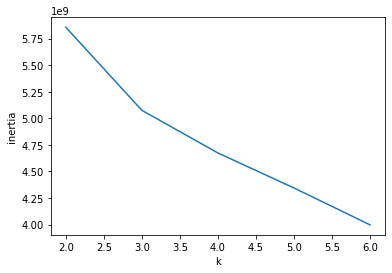

In [13]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

##### 해석
- 뚜렸하게 꺾이는 지점이라고 하긴 애매하지만 k=3일 때 그래프가 꺾이는 곳이 눈에 띈다.
- 그 후로는 이너셔의 변화가 줄어들며 군집 효과도 감소하지만 명확하게 보이지는 않는다.
- 현재 데이터에서 군집 분석을 하는 경우 KMeans의 k값은 3이 최적이라고 판단된다.